In [1]:
%pylab inline
%config InlineBackend.figure_format ='retina'
import time

import pandas as pd
import anndata


Populating the interactive namespace from numpy and matplotlib


In [2]:
Z_df = pd.read_csv('cao_linear_Z.csv', index_col=0)
W_df = pd.read_csv('cao_linear_W.csv', index_col=0)

In [3]:
W_df.head()

,gene_name,w0,w1,w2,w3,w4,w5,w6,w7,w8,w9,length,w0w1l
ENSMUSG00000098178.1,Gm42418,-0.370493,-0.234104,0.622348,-0.587298,-0.558491,0.512815,0.236952,-0.272706,0.266390,-0.440811,1.376586,0.438257
ENSMUSG00000064339.1,mt-Rnr2,-0.180532,-0.189003,0.536189,-0.587970,-0.507891,0.397798,0.232269,-0.172326,0.215428,-0.643161,1.288964,0.261370
ENSMUSG00000064337.1,mt-Rnr1,-0.257185,-0.235700,0.593896,-0.570087,-0.526330,0.451674,0.227710,-0.165990,0.237907,-0.599486,1.332603,0.348853
ENSMUSG00000060534.15,Dcc,-0.177856,-0.297961,-0.024785,0.501987,-0.487907,0.299524,-0.109603,-0.160086,-0.515255,-0.475185,1.108925,0.347007
ENSMUSG00000092341.2,Malat1,-0.092280,0.092773,0.060727,-0.153279,-0.210427,0.036895,0.145338,-0.469101,0.024399,-0.166671,0.599583,0.130853


In [4]:
from openTSNE import TSNE
from openTSNE.callbacks import ErrorLogger

In [5]:
cols = list(filter(lambda s: s.startswith('w') and len(s) == 2, W_df.columns))
XX = W_df[cols]

In [6]:
tsne = TSNE(callbacks=ErrorLogger(),
            initialization='random',
            negative_gradient_method='fft',
            callbacks_every_iters=100,
            neighbors='approx')

YY = tsne.fit(XX)

Iteration  100, KL divergence  3.2901, 100 iterations in 1.8740 sec
Iteration  200, KL divergence  3.2751, 100 iterations in 1.6835 sec
Iteration  100, KL divergence  1.4596, 100 iterations in 1.5339 sec
Iteration  200, KL divergence  1.4219, 100 iterations in 2.1273 sec
Iteration  300, KL divergence  1.4109, 100 iterations in 2.8065 sec
Iteration  400, KL divergence  1.4044, 100 iterations in 3.3919 sec
Iteration  500, KL divergence  1.4035, 100 iterations in 3.9185 sec
Iteration  600, KL divergence  1.3954, 100 iterations in 4.3554 sec
Iteration  700, KL divergence  1.3932, 100 iterations in 4.7383 sec


In [7]:
from adjustText import adjust_text

In [8]:
W_df['tsne_0'] = YY[:, 0]
W_df['tsne_1'] = YY[:, 1]

194

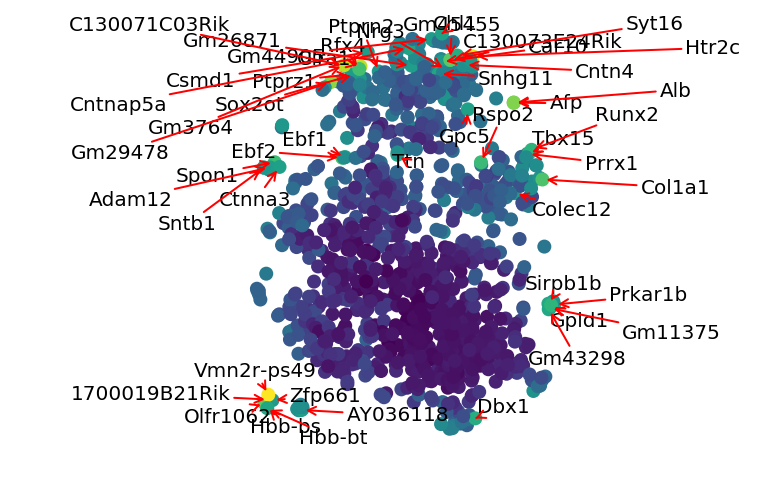

In [35]:
plt.scatter(YY[:, 0], YY[:, 1], c=W_df['length'])
plt.axis('equal');
plt.axis('off');

texts = []
for i, r in W_df.sort_values('length', ascending=False).head(50).iterrows():
    texts.append(plt.text(r.tsne_0, r.tsne_1, r.gene_name))

adjust_text(texts, x=YY[:, 0], y=YY[:, 1], arrowprops=dict(arrowstyle='->', color='red'))

In [10]:
Z_df.head()

,z0,z1,z2,z3,z4,z5,z6,z7,z8,z9
index,,,,,,,,,,
sci3-me-001.GTCGGAGTTTGAGGTAGAA,-0.745594,-2.756632,1.479880,-1.660819,-0.202492,0.553452,1.076042,-0.408616,0.121240,0.974321
sci3-me-001.ATTAGTCTGTGTATAATACG,-0.585587,-0.133567,0.516465,-1.329613,-0.336456,0.995208,-1.659056,-0.748753,0.221256,-1.472844
sci3-me-001.GAGGAACTTAATACCATCC,0.000472,1.841417,0.613530,-0.975045,-0.998008,1.945155,0.924648,-1.131910,-1.759421,-0.968559
sci3-me-001.TTCGCGGATACTCTCTCAA,-1.212717,-3.528404,2.201576,-0.831431,0.136636,-0.916431,1.206996,0.422100,-0.082427,-0.348994
sci3-me-001.ACTGGTTATTTGCGCCATCT,-1.956244,-0.300781,-1.069563,-3.968046,1.100353,0.659750,1.478010,-0.693649,1.123223,0.213368


In [11]:
Z_df.shape

(1949131, 10)

In [12]:
tsne = TSNE(callbacks=ErrorLogger(),
            initialization='random',
            negative_gradient_method='fft',
            callbacks_every_iters=100,
            neighbors='approx')

YY2 = tsne.fit(Z_df.head(100000))

Iteration  100, KL divergence  7.5752, 100 iterations in 26.1082 sec
Iteration  200, KL divergence  6.5392, 100 iterations in 26.0733 sec
Iteration  100, KL divergence  4.9689, 100 iterations in 25.0690 sec
Iteration  200, KL divergence  4.5933, 100 iterations in 25.2665 sec
Iteration  300, KL divergence  4.3731, 100 iterations in 25.5009 sec
Iteration  400, KL divergence  4.2206, 100 iterations in 27.7947 sec
Iteration  500, KL divergence  4.1057, 100 iterations in 29.3037 sec
Iteration  600, KL divergence  4.0142, 100 iterations in 30.7598 sec
Iteration  700, KL divergence  3.9391, 100 iterations in 31.9546 sec


In [14]:
import matplotlib.colors as mcolors

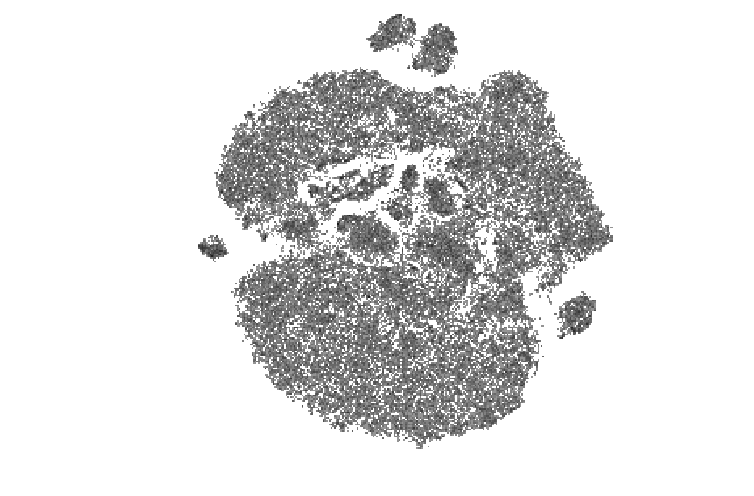

In [24]:
plt.hist2d(YY2[:, 0], YY2[:, 1], bins=256, norm=mcolors.PowerNorm(0.25), cmap=cm.gray_r);
plt.axis('equal');
plt.axis('off');